In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import sys
import os

# Load & pre-process data

In [2]:
df_luad = pd.read_csv("data/tcga/rnaseq_LUAD.txt", sep="\t", low_memory=False)
df_lusc = pd.read_csv("data/tcga/rnaseq_LUSC.txt", sep="\t", low_memory=False)

### Explore

In [3]:
df_luad.head()

,Hybridization REF,TCGA-05-4244-01A-01R-1107-07,TCGA-05-4249-01A-01R-1107-07,TCGA-05-4250-01A-01R-1107-07,TCGA-05-4382-01A-01R-1206-07,TCGA-05-4384-01A-01R-1755-07,TCGA-05-4389-01A-01R-1206-07,TCGA-05-4390-01A-02R-1755-07,TCGA-05-4395-01A-01R-1206-07,TCGA-05-4396-01A-21R-1858-07,...,TCGA-NJ-A4YG-01A-22R-A262-07,TCGA-NJ-A4YI-01A-11R-A262-07,TCGA-NJ-A4YP-01A-11R-A262-07,TCGA-NJ-A4YQ-01A-11R-A262-07,TCGA-NJ-A55A-01A-11R-A262-07,TCGA-NJ-A55O-01A-11R-A262-07,TCGA-NJ-A55R-01A-11R-A262-07,TCGA-NJ-A7XG-01A-12R-A39D-07,TCGA-O1-A52J-01A-11R-A262-07,TCGA-S2-AA1A-01A-12R-A39D-07
0,gene_id,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,...,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count
1,?|100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,?|100133144,10.0113,7.1957,7.2453,11.3311,3.2254,4.0000,7.1084,3.4360,13.5406,...,11.7148,3.6657,2.3298,16.3214,20.3514,15.5193,8.4195,42.9857,14.0861,20.5338
3,?|100134869,11.2820,12.4436,6.0184,7.5740,3.4942,13.7852,7.5810,12.1335,16.0273,...,11.9573,9.7617,8.3410,7.5330,17.2393,22.9872,10.3226,81.1128,24.1914,8.9500
4,?|10357,49.5994,90.5117,49.5366,82.8303,72.5351,66.3658,109.1809,57.0596,108.4155,...,163.5739,130.7486,101.7403,82.4231,100.4196,100.1867,74.7210,85.3715,61.1388,76.9265


In [4]:
df_lusc.head()

,Hybridization REF,TCGA-18-3406-01A-01R-0980-07,TCGA-18-3407-01A-01R-0980-07,TCGA-18-3408-01A-01R-0980-07,TCGA-18-3409-01A-01R-0980-07,TCGA-18-3410-01A-01R-0980-07,TCGA-18-3411-01A-01R-0980-07,TCGA-18-3412-01A-01R-0980-07,TCGA-18-3414-01A-01R-0980-07,TCGA-18-3415-01A-01R-0980-07,...,TCGA-NK-A5CX-01A-11R-A26W-07,TCGA-NK-A5D1-01A-11R-A26W-07,TCGA-NK-A7XE-01A-12R-A405-07,TCGA-O2-A52N-01A-11R-A26W-07,TCGA-O2-A52Q-01A-11R-A26W-07,TCGA-O2-A52S-01A-11R-A262-07,TCGA-O2-A52V-01A-31R-A262-07,TCGA-O2-A52W-01A-11R-A26W-07,TCGA-O2-A5IB-01A-11R-A27Q-07,TCGA-XC-AA0X-01A-32R-A405-07
0,gene_id,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,...,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count
1,?|100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,?|100133144,75.3622,14.4148,8.4888,2.5897,16.6653,12.9418,47.5782,12.3168,55.1387,...,40.3766,39.5911,20.8723,30.2240,4.2895,19.9503,30.0872,53.6593,72.5666,44.7501
3,?|100134869,25.4252,6.9933,3.3754,7.1538,19.5722,14.4142,20.8881,25.7116,39.0809,...,17.3322,21.7407,15.7901,4.2022,3.6632,47.1026,15.2957,33.3907,42.1832,23.6304
4,?|10357,279.9764,198.2540,254.5929,164.3744,200.8033,277.6667,394.3623,205.8704,162.0405,...,142.3695,234.1647,133.6915,131.5628,153.5980,176.7177,188.7215,260.3332,160.1624,76.6488


### Keep `gene_id`

In [5]:
genes = df_luad.iloc[1:,0]
genes

1             ?|100130426
2             ?|100133144
3             ?|100134869
4                 ?|10357
5                 ?|10431
               ...       
20527            ZYX|7791
20528         ZZEF1|23140
20529          ZZZ3|26009
20530    psiTPTE22|387590
20531         tAKR|389932
Name: Hybridization REF, Length: 20531, dtype: object

### Join both data-frames and convert them to float

Are the gene_id columns equal?

In [6]:
all(df_luad.iloc[:,0] == df_lusc.iloc[:,0])

True

Then we can just concatenate the data-frames

In [7]:
df = pd.concat([df_luad.iloc[1:,1:], df_lusc.iloc[1:,1:]], axis=1)

What are the data types?

In [8]:
df.dtypes

TCGA-05-4244-01A-01R-1107-07    object
TCGA-05-4249-01A-01R-1107-07    object
TCGA-05-4250-01A-01R-1107-07    object
TCGA-05-4382-01A-01R-1206-07    object
TCGA-05-4384-01A-01R-1755-07    object
                                 ...  
TCGA-O2-A52S-01A-11R-A262-07    object
TCGA-O2-A52V-01A-31R-A262-07    object
TCGA-O2-A52W-01A-11R-A26W-07    object
TCGA-O2-A5IB-01A-11R-A27Q-07    object
TCGA-XC-AA0X-01A-32R-A405-07    object
Length: 1128, dtype: object

Conver to float

In [9]:
df = df.astype('float')

In [10]:
df.shape

(20531, 1128)

Assign `genes` as an dataframe index

In [11]:
df.set_index(genes, inplace=True)

In [12]:
df.tail()

,TCGA-05-4244-01A-01R-1107-07,TCGA-05-4249-01A-01R-1107-07,TCGA-05-4250-01A-01R-1107-07,TCGA-05-4382-01A-01R-1206-07,TCGA-05-4384-01A-01R-1755-07,TCGA-05-4389-01A-01R-1206-07,TCGA-05-4390-01A-02R-1755-07,TCGA-05-4395-01A-01R-1206-07,TCGA-05-4396-01A-21R-1858-07,TCGA-05-4397-01A-01R-1206-07,...,TCGA-NK-A5CX-01A-11R-A26W-07,TCGA-NK-A5D1-01A-11R-A26W-07,TCGA-NK-A7XE-01A-12R-A405-07,TCGA-O2-A52N-01A-11R-A26W-07,TCGA-O2-A52Q-01A-11R-A26W-07,TCGA-O2-A52S-01A-11R-A262-07,TCGA-O2-A52V-01A-31R-A262-07,TCGA-O2-A52W-01A-11R-A26W-07,TCGA-O2-A5IB-01A-11R-A27Q-07,TCGA-XC-AA0X-01A-32R-A405-07
Hybridization REF,,,,,,,,,,,,,,,,,,,,,
ZYX|7791,2837.9440,2351.2500,5437.4534,6770.1537,3341.4783,2565.4362,5256.2670,4949.2246,1678.5444,3857.5373,...,5169.3361,2652.4533,1754.7408,7236.6120,8943.3986,2681.7053,6094.3376,2560.9887,1185.0373,5303.4060
ZZEF1|23140,871.2802,1138.1170,1170.5214,1169.2401,1737.3244,679.1946,780.4567,467.3537,1474.6020,494.9752,...,865.6315,919.3925,768.0152,762.8415,644.6723,1069.5364,663.9353,730.2526,833.3333,1510.6355
ZZZ3|26009,575.2683,690.2752,532.8691,663.8297,723.2743,753.0201,491.1384,798.8768,884.0030,786.0850,...,589.8032,876.1682,432.3641,589.6175,827.0892,783.1126,778.6532,761.9559,1383.1203,649.8760
psiTPTE22|387590,6.6323,179.9738,6.3003,35.1777,378.1307,11.0738,5.7480,3.2213,15.1630,32.0265,...,5.8687,157.1262,3.1606,463.3880,13.4203,5.3808,2.1011,12.3589,1.0650,460.3941
tAKR|389932,0.0000,0.0000,0.0000,0.0000,0.0000,0.6711,0.6387,0.0000,0.0000,0.0000,...,0.0000,0.0000,26.5487,0.0000,0.0000,1.2417,0.0000,0.0000,0.0000,0.0000


# Prepare cathegories

We want to know whether a sample belongs to a tumor or normal tissue.

TCGA documentation (https://docs.gdc.cancer.gov/Encyclopedia/pages/TCGA_Barcode/) mentions that the information is encoded in the 'BarCode'

For instance, sample `TCGA-05-4244-01A-01R-1107-07`, the fourth identifier is `01A` which means 'Tumor' (`01`), whereas sample `TCGA-91-6829-11A-01R-1858-07`, has the fourth identifier `11A` which means Normal.



In [13]:
def to_tumor_normal(barcode):
    return barcode.split('-')[3][0] == '0'

tn = [to_tumor_normal(b) for b in df.columns]

How many tumor vs normal samples are in the dataset?

In [14]:
sum(tn), sum(1 - np.array(tn))

(1018, 110)

Create input `x` and output `y`

In [15]:
x = df.to_numpy().T
y = np.array(tn)

Scale inputs

In [16]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

Make sure the dimentions for `x` and `y` match

In [17]:
x.shape, y.shape

((1128, 20531), (1128,))

Split test set

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((902, 20531), (226, 20531), (902,), (226,))

# Create classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

rf = GradientBoostingClassifier(n_estimators=25)
rf.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

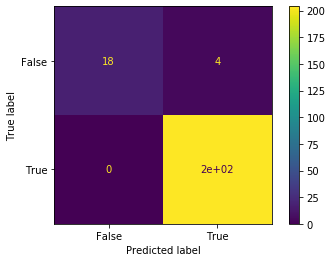

In [30]:
sk.metrics.plot_confusion_matrix(rf, x_test, y_test)

Now we can use all the data

In [21]:
imp_genes = pd.Series(rf.feature_importances_, genes).sort_values(ascending=False)
imp_genes

Hybridization REF
STX11|8676          0.937757
C9orf140|89958      0.037637
PAFAH1B2|5049       0.010375
LOC115110|115110    0.002998
SPPL2B|56928        0.002406
                      ...   
PNLIP|5406          0.000000
PNMA1|9240          0.000000
PNMA2|10687         0.000000
PNMA3|29944         0.000000
?|100130426         0.000000
Length: 20531, dtype: float64

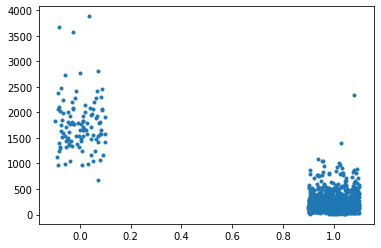

In [22]:
spread = 0.2
px = y + (spread * np.random.rand(len(y)) - spread/2)
py = df.loc['STX11|8676']
plt.plot(px, py, '.')

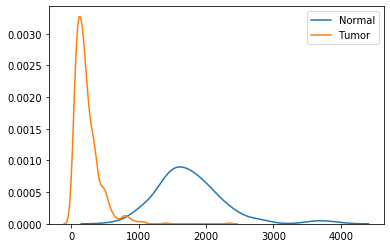

In [23]:
import seaborn as sns
sns.kdeplot(py[y==0], label="Normal")
sns.kdeplot(py[y==1], label="Tumor")
plt.legend();